# Minimal Working Examples 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ompy as om
import logging
from itertools import product

In [2]:
# Fake a matrix
def mockmatrix(sizex, sizey):
    mat = np.zeros((sizex, sizey))
    for row, col in product(range(sizex), range(sizey)):
       # if col < row+1 and row < 2:
       #     mat[row, col] = sizey-row
        if row in (1, 3) and col < row:
            mat[row, col] = 1
    return mat

In [3]:
Ex = range(5)
Eg = range(5)
mat = mockmatrix(len(Ex), len(Eg))
mat = om.Matrix(Ex=Ex, Eg=Eg, values=mat)

<IPython.core.display.Javascript object>


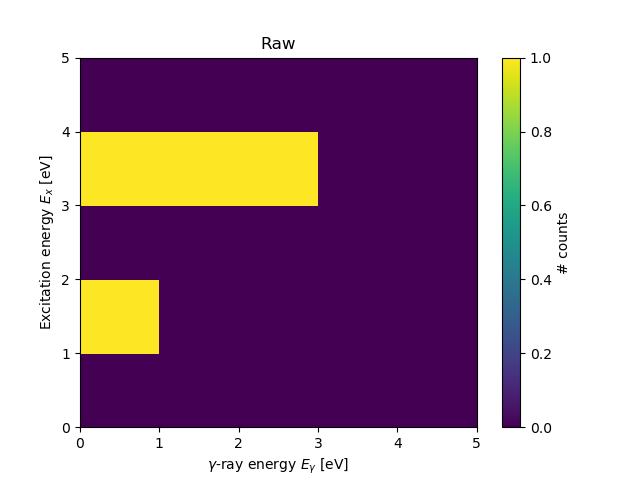

In [4]:
mat.plot(zscale='linear')

<IPython.core.display.Javascript object>


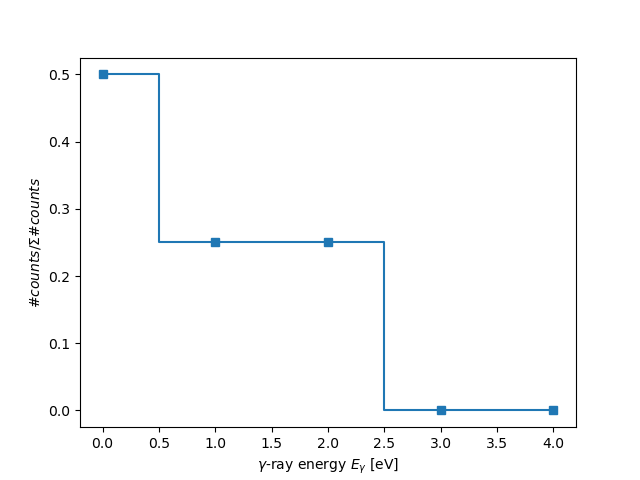

In [7]:
mat.plot_projection('Eg', normalize=True, marker='s')

<IPython.core.display.Javascript object>


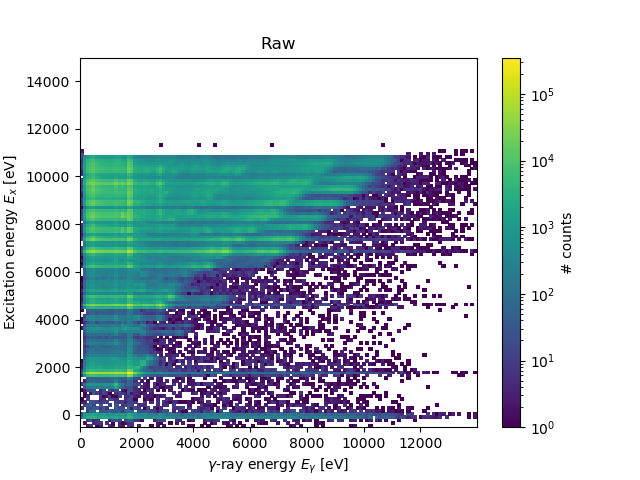

<IPython.core.display.Javascript object>


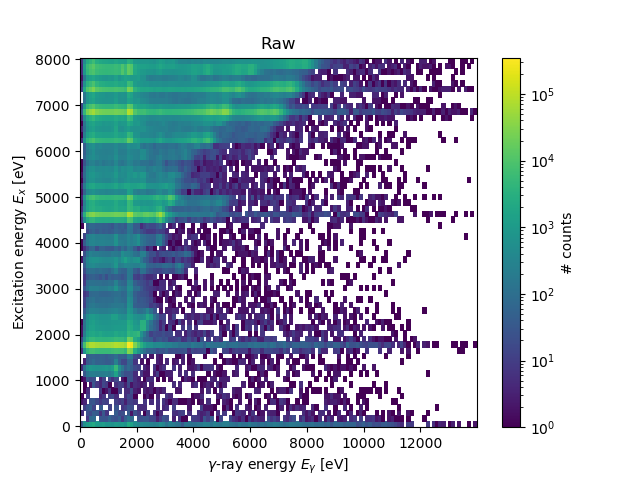

In [148]:
simat = om.load_example_raw('Si28')
simat.plot()
simat.cut('Ex', Emin=0, Emax=8000)
simat.plot()

<IPython.core.display.Javascript object>


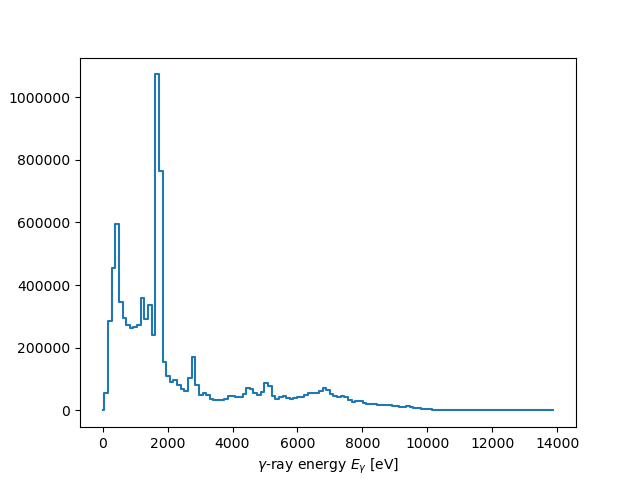

In [9]:
simat.plot_projection('x')

Apply first generation method to a mock matrix 

In [54]:
def mockfirstgen(sizex, sizey):
    m = np.zeros((sizex, sizey))
    for i in range(sizex):
        for j in range(sizey):
            if j <= i:
                m[i, j] = np.random.random()
    return m

float64
2350.0


<IPython.core.display.Javascript object>


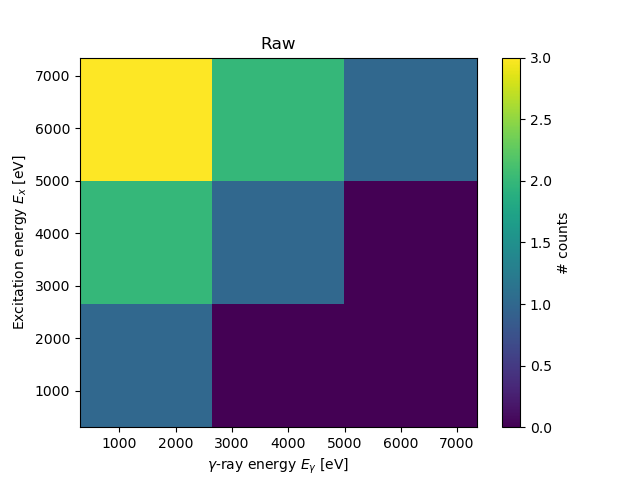

In [120]:
N = 3
Ex = np.linspace(300, 5e3, N)# + 2350/2
Eg = np.linspace(300, 5e3, N)# + 2350/2
mat = np.array([[1, 0, 0],
               [2, 1, 0],
               [3, 2, 1]], dtype=float)
mat = om.Matrix(Ex=Ex, Eg=Eg, values=mat)#mockfirstgen(N, N))
print(mat.values.dtype)
print(Ex[2]-Ex[1])
#mat.values[3,2] *= 23
#mat.values[5,1] = 2
#mat.values[5,6] = 10
#mat = om.load_example_raw('Si28')
#mat.cut_diagonal([0, 0], [10000, 10000])
mat.plot(zscale='linear')

Multiplicities:
Ex = 300.000000, multiplicity(Ex) = 1.000000
Ex = 2650.000000, multiplicity(Ex) = 2.446154
Ex = 5000.000000, multiplicity(Ex) = 2.678571

iteration = 0 max_diff = 0.7534358974358975
iteration = 1 max_diff = 0.03797273325318162
iteration = 2 max_diff = 0.016222177248045755
iteration = 3 max_diff = 0.00700320544739097
iteration = 4 max_diff = 0.003009780194228373


[autoreload of ompy.first_generation_method failed: Traceback (most recent call last):
  File "/usr/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/usr/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/usr/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/erdos/gits/oclompy/ompy/first_generation_method.py", line 91
    i_Ex_lo

<IPython.core.display.Javascript object>


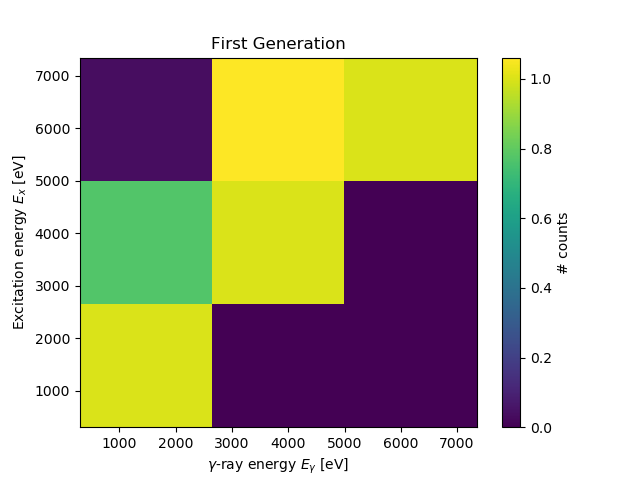

In [138]:
firstgen = om.first_generation_method(mat, Ex_max=10000, dE_gamma=0.10, verbose=True,
                                      initial_weight_function='box', N_iterations=5,
                                     multiplicity_estimation='total')
firstgen.plot(zscale='linear')

In [119]:
firstgen.values

array([[1.        , 0.        , 0.        ],
       [0.22875817, 1.        , 0.        ],
       [0.        , 1.11977377, 1.        ]])

In [122]:
firstgen.values

array([[1.        , 0.        , 0.        ],
       [0.77358491, 1.        , 0.        ],
       [0.03362331, 1.06102525, 1.        ]])

In [130]:
def firstgenette(mat):
    w = np.ones_like(mat)
    n = np.ones_like(mat)
    h = np.zeros_like(mat)
    for _ in range(3):
        for row in range(mat.shape[0]):
            gi = 0
            for j in range(row):
                gi += n[row, j]*w[row, j]*mat[j, :]
            h[row, :] = mat[row, :] - gi
        heatmap(h)

In [105]:
third = np.array([[2, 0, 0],
                 [1, 1, 0],
                 [2, 1, 1]])
second = np.array([[2, 0, 0],
                  [2, 3, 0],
                  [0, 0, 0]])
first = np.array([[2, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0]])
total = third + second + first

<IPython.core.display.Javascript object>


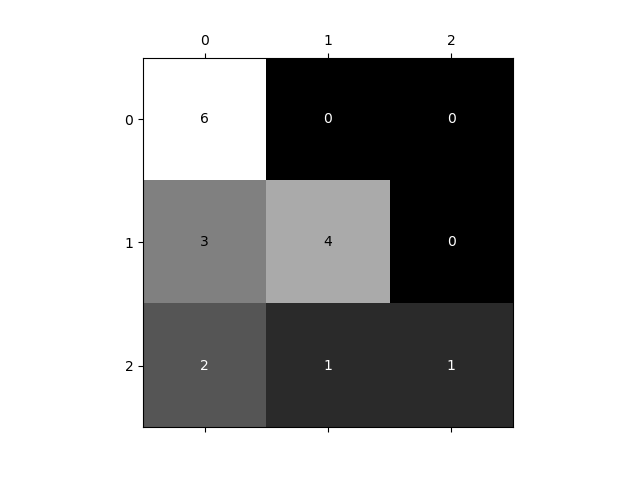

In [124]:
heatmap(total)

In [136]:
def heatmap(mat):
    fig, ax = plt.subplots()
    ax.matshow(total, cmap='Greens')
    middle = (mat.max()-mat.min())/2
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            val = mat[i, j]
            text = ax.text(j, i, val,
                       ha="center", va="center", 
                           color="w" if val < middle else "k")

<IPython.core.display.Javascript object>


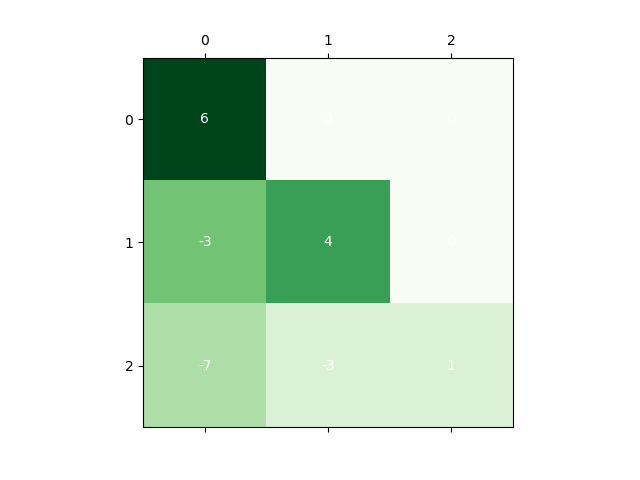

<IPython.core.display.Javascript object>


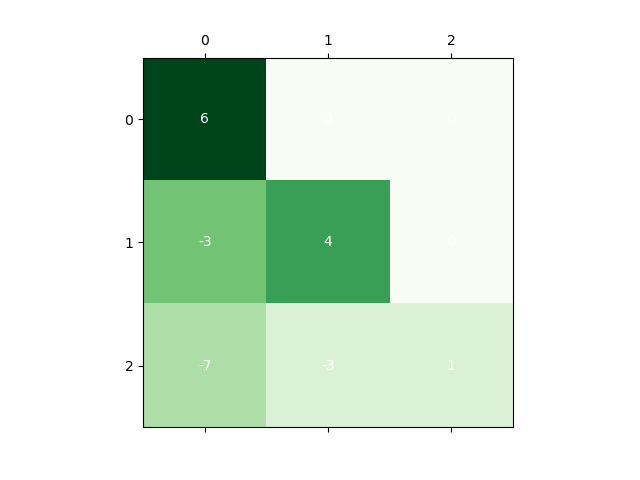

<IPython.core.display.Javascript object>


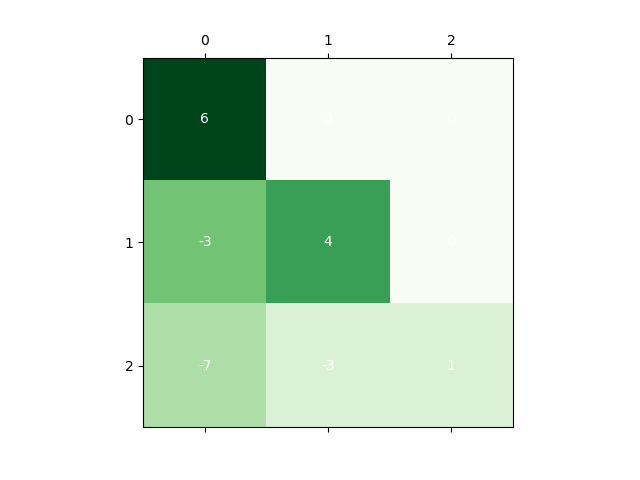

In [137]:
firstgenette(total)